<a href="https://colab.research.google.com/github/Alex-Devoid/ST-554-Project1/blob/main/Task2/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alex Devoid, Emma Martinez, Lanette Tyler   
ST 554 Project 1 Spring 2026   
Task 2 EDA Lanette Tyler

# Introduction

## Purpose     
The purpose of this project is to analyze the [air quality data set](https://archive.ics.uci.edu/dataset/360/air+quality) available from the UCI Machine Learning Repository. The data set includes non-true sensor measurements of air pollutant concentrations, gold-standard or true air pollutant concetrations measured by a reference analyzer, and corresponding weather data. This analysis includes three tasks:

1.   **Writing two gradient descent type algorithms** to find the optimal constant to use for squared error loss and to find the optimal intercept and slope from a simple linear regression (SLR) model   

2.   **Extensive Exploratory Data Analysis** to understand the relationships between the true C6H6 values and the sensor values, and between the true C6H6 values and the weather variables   

3.   **Data Modeling** using a cross-validation algorithm to evaluate a simple linear regression (SLR) model using true CO to predict true C6H6, and a multiple linear regression model in the time series setting to predict true C6H6 using true CO, temperature, relative humidity, and absolute humidity

## Data
The data set contains 9358 observations of true pollutant concentrations, sensor-read pollutant concentrations, and weather factors. The observations were made from March, 2004, to Febraury, 2005, in a significantly polluted area at road level in a city in Italy. Each observation represents an hourly average.


Specific variables in the data set are as follows:   

-   True C6H6 concentration (micrograms/cubic meter)

-   True CO concentration (mg/cubic meter)

-   CO Sensor Response     

-   True Non-metanic hydrocarbon (NMHC) concentration (micrograms/cubic meter)      

-   NMHC sensor response   

-   True NOx concentration (parts per billion)   

-   NOx sensor response   

-   True NO2 concentration (micrograms/cubic meter)

-   NO2 sensor response  

-   O3 sensor response   

-   Temperature (C)   

-   Relative humidity (%)

-   Absolute humidity


# Task 2: Exploratory Data Analysis

This exploratory data analysis investigates the relationships between the true C6H6 concentration and the sensor readings for CO, NMHC, NOx, NO2, and O3, and between the true C6H6 concentration and the weather variables temperature, relative humidity, and absolute humidity.

## Preliminary Data Tasks

### Install and Import Modules

In [64]:
#install module for reading data from UCI
!pip install ucimlrepo

In [65]:
#import modules
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

### Read in data

In [73]:
#fetch dataset
air_quality = fetch_ucirepo(id=360)

#data (as pandas dataframes)
air_qu = air_quality.data.features

#take a look at the first few observations
air_qu.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


### Data Cleaning and Validation

In [53]:
#look at the info about the data
air_qu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


#### Rename variables and subset data

In [74]:
#rename vars for convenience
air_qu = air_qu.rename(columns = {"PT08.S1(CO)": "CO", "C6H6(GT)": "true_C6H6",
                              "PT08.S2(NMHC)": "NMHC", "PT08.S3(NOx)": "NOx",
                              "PT08.S4(NO2)": "NO2", "PT08.S5(O3)": "O3",
                              "Date": "date", "Time": "time", "T": "temp",
                              "RH": "rel_hum", "AH": "abs_hum"})

#subset data to variables of interest in this analysis
air_qu = air_qu[["true_C6H6", "CO", "NMHC", "NOx", "NO2", "O3", "date", "time",
                 "temp", "rel_hum", "abs_hum"]]

#take a look
air_qu.head()

,true_C6H6,CO,NMHC,NOx,NO2,O3,date,time,temp,rel_hum,abs_hum
0,11.9,1360,1046,1056,1692,1268,3/10/2004,18:00:00,13.6,48.9,0.7578
1,9.4,1292,955,1174,1559,972,3/10/2004,19:00:00,13.3,47.7,0.7255
2,9.0,1402,939,1140,1555,1074,3/10/2004,20:00:00,11.9,54.0,0.7502
3,9.2,1376,948,1092,1584,1203,3/10/2004,21:00:00,11.0,60.0,0.7867
4,6.5,1272,836,1205,1490,1110,3/10/2004,22:00:00,11.2,59.6,0.7888


#### Remove missing values

Check for explicit missing values.

In [55]:
air_qu.isnull().sum()

,0
true_C6H6,0
CO,0
NMHC,0
NOx,0
NO2,0
O3,0
date,0
time,0
temp,0
rel_hum,0


The zeros in each row above indicate that there are no explicit missing values. In this datset, missing values are represented by -200. Now check for -200.

In [56]:
air_qu.isin([-200.0]).any()

,0
true_C6H6,True
CO,True
NMHC,True
NOx,True
NO2,True
O3,True
date,False
time,False
temp,True
rel_hum,True


The variable columns listed above with "True" values contain -200. Replace them with np.nan for easier removal.

In [75]:
#replace -200.0 with np.nan
air_qu = air_qu.replace([-200.0],[np.nan])
air_qu.isnull().sum() #see the nan's

,0
true_C6H6,366
CO,366
NMHC,366
NOx,366
NO2,366
O3,366
date,0
time,0
temp,366
rel_hum,366


Remove the observations/rows with NaN values.

In [76]:
#remove the rows with np.nan values
air_qu = air_qu.dropna()
air_qu.isnull().sum() #see that there are no nan's left

,0
true_C6H6,0
CO,0
NMHC,0
NOx,0
NO2,0
O3,0
date,0
time,0
temp,0
rel_hum,0


Rows with missing values have been removed. Now let's reset the index.

In [77]:
#fix index
air_qu = air_qu.reset_index()
air_qu = air_qu.rename(columns = {"index": "old_index"})
air_qu

,old_index,true_C6H6,CO,NMHC,NOx,NO2,O3,date,time,temp,rel_hum,abs_hum
0,0,11.9,1360.0,1046.0,1056.0,1692.0,1268.0,3/10/2004,18:00:00,13.6,48.9,0.7578
1,1,9.4,1292.0,955.0,1174.0,1559.0,972.0,3/10/2004,19:00:00,13.3,47.7,0.7255
2,2,9.0,1402.0,939.0,1140.0,1555.0,1074.0,3/10/2004,20:00:00,11.9,54.0,0.7502
3,3,9.2,1376.0,948.0,1092.0,1584.0,1203.0,3/10/2004,21:00:00,11.0,60.0,0.7867
4,4,6.5,1272.0,836.0,1205.0,1490.0,1110.0,3/10/2004,22:00:00,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...
8986,9352,13.5,1314.0,1101.0,539.0,1374.0,1729.0,4/4/2005,10:00:00,21.9,29.3,0.7568
8987,9353,11.4,1163.0,1027.0,604.0,1264.0,1269.0,4/4/2005,11:00:00,24.3,23.7,0.7119
8988,9354,12.4,1142.0,1063.0,603.0,1241.0,1092.0,4/4/2005,12:00:00,26.9,18.3,0.6406
8989,9355,9.5,1003.0,961.0,702.0,1041.0,770.0,4/4/2005,13:00:00,28.3,13.5,0.5139


#### Update Data Types and Add Columns

Change the values in the date column from string type to datetime.date type. Add columns for year, month and week by extracting the values from the date.

In [78]:
for i in range(0, len(air_qu)):
    air_qu.loc[i, "date"] = datetime.strptime(air_qu.loc[i, "date"], "%m/%d/%Y").date()
    air_qu.loc[i, "year"] = air_qu.date[i].year
    air_qu.loc[i, "month"] = air_qu.date[i].month
    air_qu.loc[i, "week"] = air_qu.date[i].strftime("%V")

#make the new columns integers
air_qu.year = air_qu.year.astype("int64")
air_qu.month = air_qu.month.astype("int64")
air_qu.week = air_qu.week.astype("int64")

air_qu.head() #take a look at the results

,old_index,true_C6H6,CO,NMHC,NOx,NO2,O3,date,time,temp,rel_hum,abs_hum,year,month,week
0,0,11.9,1360.0,1046.0,1056.0,1692.0,1268.0,2004-03-10,18:00:00,13.6,48.9,0.7578,2004,3,11
1,1,9.4,1292.0,955.0,1174.0,1559.0,972.0,2004-03-10,19:00:00,13.3,47.7,0.7255,2004,3,11
2,2,9.0,1402.0,939.0,1140.0,1555.0,1074.0,2004-03-10,20:00:00,11.9,54.0,0.7502,2004,3,11
3,3,9.2,1376.0,948.0,1092.0,1584.0,1203.0,2004-03-10,21:00:00,11.0,60.0,0.7867,2004,3,11
4,4,6.5,1272.0,836.0,1205.0,1490.0,1110.0,2004-03-10,22:00:00,11.2,59.6,0.7888,2004,3,11


Change the values in the time column to simple integers. Rename the time column as hour.

In [79]:
#change time values to simple integers
for i in range(0, len(air_qu)):
    air_qu.loc[i, "time"] = int(air_qu.loc[i, "time"][:-6])

#rename time column as hour column
air_qu = air_qu.rename(columns = {"time": "hour"})

air_qu.head() #take a look at the results

,old_index,true_C6H6,CO,NMHC,NOx,NO2,O3,date,hour,temp,rel_hum,abs_hum,year,month,week
0,0,11.9,1360.0,1046.0,1056.0,1692.0,1268.0,2004-03-10,18,13.6,48.9,0.7578,2004,3,11
1,1,9.4,1292.0,955.0,1174.0,1559.0,972.0,2004-03-10,19,13.3,47.7,0.7255,2004,3,11
2,2,9.0,1402.0,939.0,1140.0,1555.0,1074.0,2004-03-10,20,11.9,54.0,0.7502,2004,3,11
3,3,9.2,1376.0,948.0,1092.0,1584.0,1203.0,2004-03-10,21,11.0,60.0,0.7867,2004,3,11
4,4,6.5,1272.0,836.0,1205.0,1490.0,1110.0,2004-03-10,22,11.2,59.6,0.7888,2004,3,11


The data types indicated in the info table above are appropriate, and the numeric variable summaries listed in the description below are reasonable values.

In [83]:
air_qu.describe(include = "all")
type(air_qu.year[0])
air_qu.info() #do data validation for reasonable values list describes with nums anad with objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8991 entries, 0 to 8990
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   old_index  8991 non-null   int64  
 1   true_C6H6  8991 non-null   float64
 2   CO         8991 non-null   float64
 3   NMHC       8991 non-null   float64
 4   NOx        8991 non-null   float64
 5   NO2        8991 non-null   float64
 6   O3         8991 non-null   float64
 7   date       8991 non-null   object 
 8   hour       8991 non-null   object 
 9   temp       8991 non-null   float64
 10  rel_hum    8991 non-null   float64
 11  abs_hum    8991 non-null   float64
 12  year       8991 non-null   int64  
 13  month      8991 non-null   int64  
 14  week       8991 non-null   int64  
dtypes: float64(9), int64(4), object(2)
memory usage: 1.0+ MB


# Univariate Data Summaries

## Response Variable: True Benzene (C6H6) Concentration

In [ ]:
air_qu.true_C6H6.describe()[1:].round(2)

,true_C6H6
mean,10.08
std,7.45
min,0.10
25%,4.40
50%,8.20
75%,14.00
max,63.70


<Axes: title={'center': 'True Concentration of Benzene (C6H6)'}>

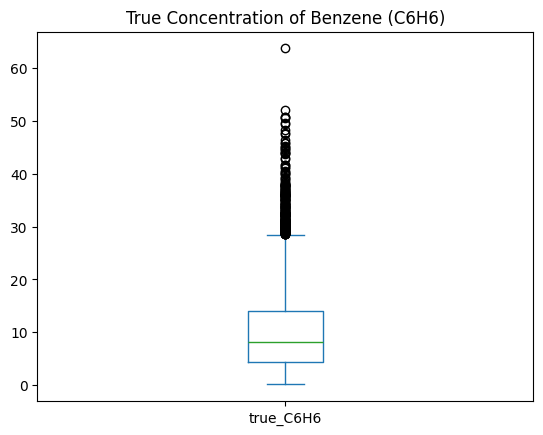

In [ ]:
air_qu.true_C6H6.plot.box(title = "True Concentration of Benzene (C6H6)")

[Text(0.5, 0, 'C6H6 Concentration (micrograms per cubic meter)')]

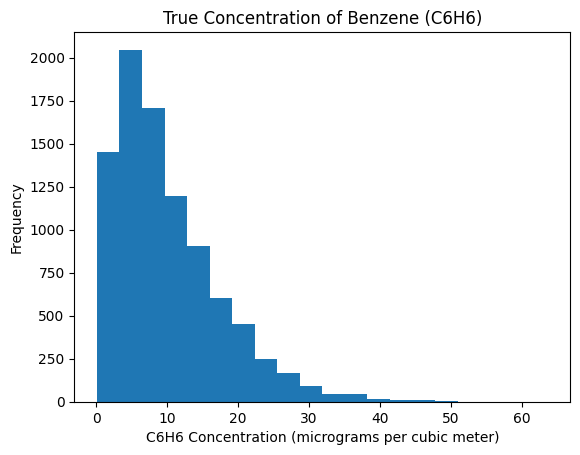

In [ ]:
air_qu.true_C6H6.plot.hist(bins = 20,
    title = "True Concentration of Benzene (C6H6)")\
    .set(xlabel = "C6H6 Concentration (micrograms per cubic meter)")

## Predictor Variables: Concentrations of Environmental Pollutants, from Sensors

In [ ]:
air_qu[["CO", "NMHC", "NOx", "NO2", "O3"]].describe()[1:].round(2)

,CO,NMHC,NOx,NO2,O3
mean,1099.83,939.15,835.49,1456.26,1022.91
std,217.08,266.83,256.82,346.21,398.48
min,647.00,383.00,322.00,551.00,221.00
25%,937.00,734.50,658.00,1227.00,731.50
50%,1063.00,909.00,806.00,1463.00,963.00
75%,1231.00,1116.00,969.50,1674.00,1273.50
max,2040.00,2214.00,2683.00,2775.00,2523.00


[Text(0, 0.5, 'Sensor-Read Concentration')]

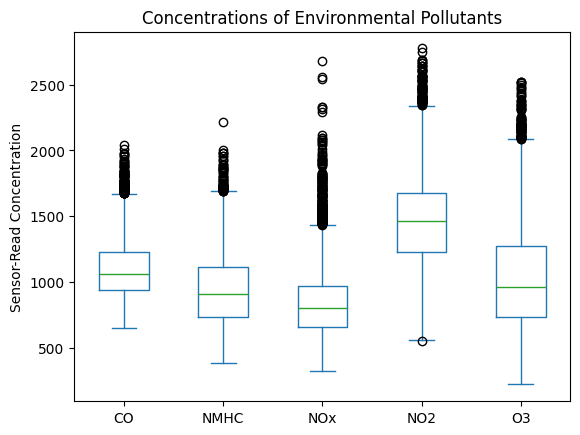

In [ ]:
air_qu[["CO", "NMHC", "NOx", "NO2","O3"]].plot.box(label = "CO",
                   title = "Concentrations of Environmental Pollutants")\
                   .set(ylabel = "Sensor-Read Concentration")

Text(0.5, 0, 'Sensor-Read Concentration')

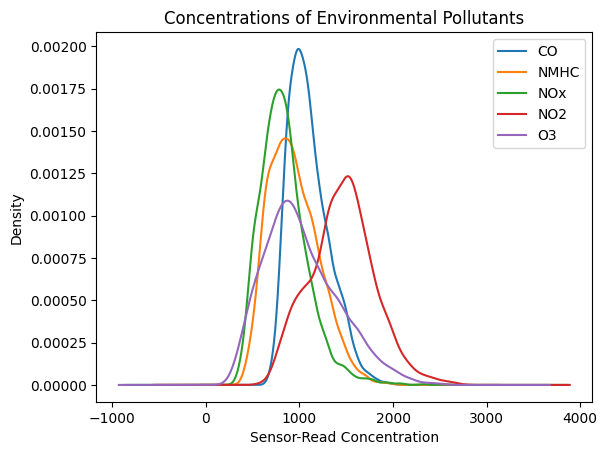

In [ ]:
air_qu["CO"].plot.density(title="Concentrations of Environmental Pollutants",
                          label = "CO")
air_qu["NMHC"].plot.density(label = "NMHC")
air_qu["NOx"].plot.density(label = "NOx")
air_qu["NO2"].plot.density(label = "NO2")
air_qu["O3"].plot.density(label = "O3")
plt.legend()
plt.xlabel("Sensor-Read Concentration")

## Predictor Variables: Environment

In [ ]:
air_qu[["temp", "rel_hum", "abs_hum"]].describe()[1:]

,temp,rel_hum,abs_hum
mean,18.317829,49.234201,1.025530
std,8.832116,17.316892,0.403813
min,-1.900000,9.200000,0.184700
25%,11.800000,35.800000,0.736800
50%,17.800000,49.600000,0.995400
75%,24.400000,62.500000,1.313700
max,44.600000,88.700000,2.231000


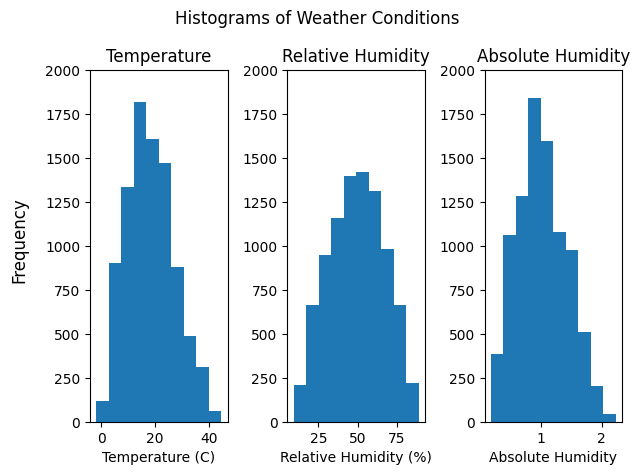

In [ ]:
fig, ax = plt.subplots(1, 3)
fig.suptitle("Histograms of Weather Conditions")
fig.supylabel("Frequency")

ax[0].hist(air_qu.temp); ax[0].set_title("Temperature")
ax[0].set_xlabel("Temperature (C)")
ax[0].set_yticks([0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000])

ax[1].hist(air_qu.rel_hum); ax[1].set_title("Relative Humidity")
ax[1].set_xlabel("Relative Humidity (%)")
ax[1].set_yticks([0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000])

ax[2].hist(air_qu.abs_hum); ax[2].set_title("Absolute Humidity")
ax[2].set_xlabel("Absolute Humidity")
ax[2].set_yticks([0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000])

fig.tight_layout()


# Multivariate Summaries

## True C6H6 and Pollutant Sensors

In [ ]:
print("Correlation Coefficicients")
air_qu[["true_C6H6", "CO", "NMHC", "NOx", "NO2","O3"]].corr().iloc[0, range(1, 6)]

Correlation Coefficicients


,true_C6H6
CO,0.883795
NMHC,0.981950
NOx,-0.735744
NO2,0.765731
O3,0.865689


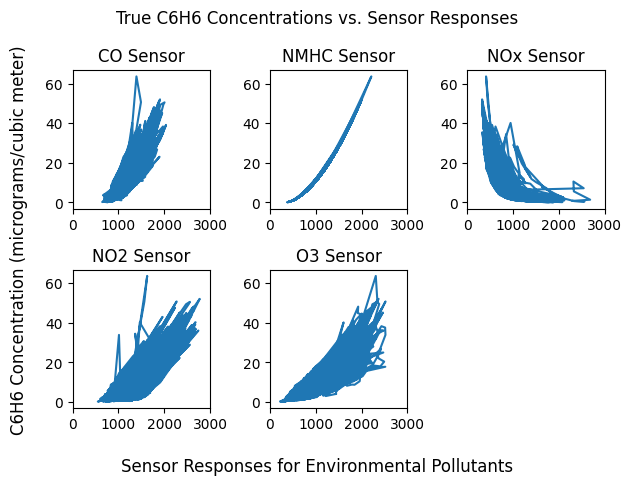

In [ ]:
x1, x2, x3, x4, x5 = air_qu.CO, air_qu.NMHC, air_qu.NOx, air_qu.NO2, air_qu.O3
y = air_qu.true_C6H6

fig, (ax1, ax2) = plt.subplots(2,3)
fig.suptitle("True C6H6 Concentrations vs. Sensor Responses")
fig.supylabel("C6H6 Concentration (micrograms/cubic meter)")
fig.supxlabel("Sensor Responses for Environmental Pollutants")

ax1[0].plot(x1, y); ax1[0].set_title("CO Sensor")
ax1[0].set_xticks([0, 1000, 2000, 3000])

ax1[1].plot(x2, y); ax1[1].set_title("NMHC Sensor")
ax1[1].set_xticks([0, 1000, 2000, 3000])

ax1[2].plot(x3, y); ax1[2].set_title("NOx Sensor")
ax1[2].set_xticks([0, 1000, 2000, 3000])

ax2[0].plot(x4, y); ax2[0].set_title("NO2 Sensor")
ax2[0].set_xticks([0, 1000, 2000, 3000])

ax2[1].plot(x5, y); ax2[1].set_title("O3 Sensor")
ax2[1].set_xticks([0, 1000, 2000, 3000])

ax2[2].remove()

fig.tight_layout()

## True C6H6 and Weather Conditions

In [ ]:
print("Correlation Coefficicients")
air_qu[["true_C6H6", "temp", "rel_hum", "abs_hum"]].corr().iloc[0, range(1, 4)]

Correlation Coefficicients


,true_C6H6
temp,0.198956
rel_hum,-0.061681
abs_hum,0.167972


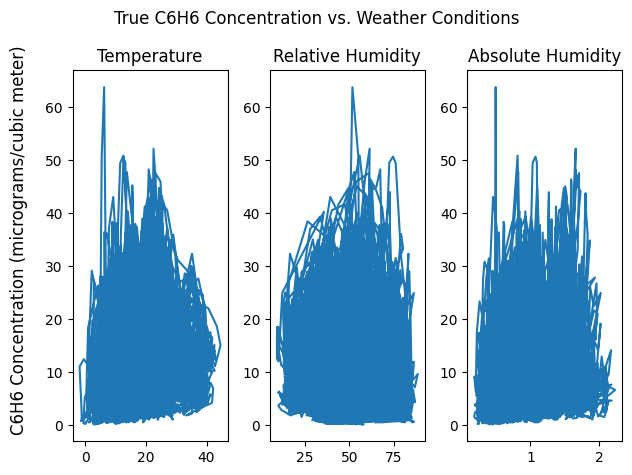

In [ ]:
x1, x2, x3 = air_qu.temp, air_qu.rel_hum, air_qu.abs_hum
y = air_qu.true_C6H6

fig, ax = plt.subplots(1,3)
fig.suptitle("True C6H6 Concentration vs. Weather Conditions")
fig.supylabel("C6H6 Concentration (micrograms/cubic meter)")
#fig.supxlabel("Sensor Responses for Environmental Pollutant Concentrations")

ax[0].plot(x1, y); ax[0].set_title("Temperature")
ax[1].plot(x2, y); ax[1].set_title("Relative Humidity")
ax[2].plot(x3, y); ax[2].set_title("Absolute Humidity")

fig.tight_layout()

## Time Series Summaries

### True C6H6

In [ ]:
pd.pivot_table(air_qu, values = "true_C6H6", index = "Date")

,true_C6H6
Date,
1/1/2005,7.183333
1/10/2005,12.541667
1/11/2005,13.779167
1/12/2005,15.333333
1/13/2005,12.495833
...,...
9/5/2004,5.712500
9/6/2004,6.058333
9/7/2004,9.713043


<Axes: xlabel='Date'>

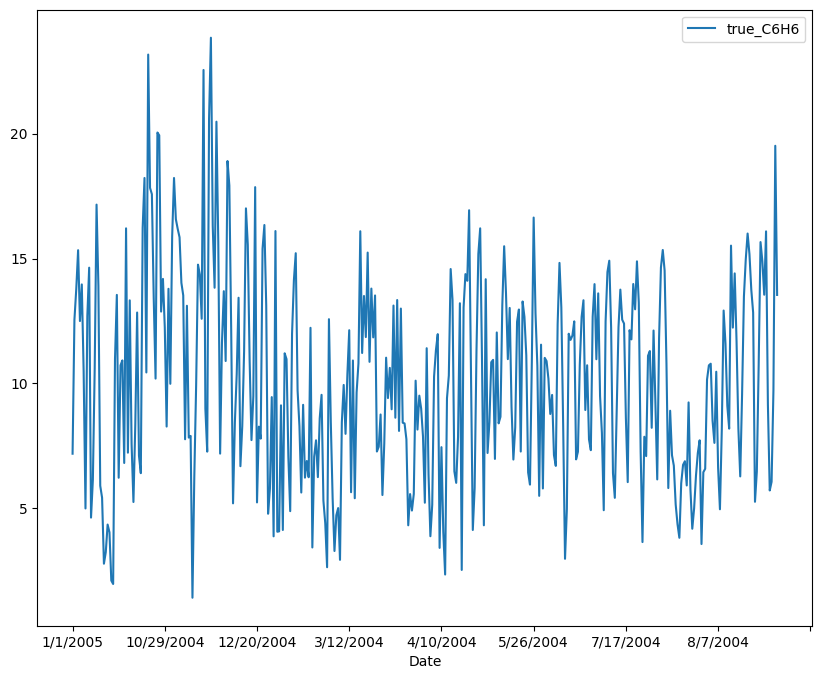

In [ ]:
#default value reported is mean
pd.pivot_table(air_qu, values = "true_C6H6", index = "Date").plot.line(figsize = (10,8))

In [ ]:
data_summary = air_qu.groupby("Date").agg(max_C6H6 = ("true_C6H6", "max"),
                                                   mean_C6H6 = ("true_C6H6", "mean"),
                                                   median_C6H6 = ("true_C6H6", "median"),
                                                   min_C6H6 = ("true_C6H6", "min"))
data_summary

,max_C6H6,mean_C6H6,median_C6H6,min_C6H6
Date,,,,
2004-03-10,11.9,8.450000,9.10,4.7
2004-03-11,27.4,7.979167,5.75,1.1
2004-03-12,32.6,12.129167,12.20,1.0
2004-03-13,19.6,10.916667,10.75,2.6
2004-03-14,23.1,9.637500,8.90,2.4
...,...,...,...,...
2005-04-01,7.4,3.412500,3.55,0.8
2005-04-02,5.8,2.529167,2.45,0.9
2005-04-03,11.1,4.316667,4.15,1.0


<Axes: xlabel='Date'>

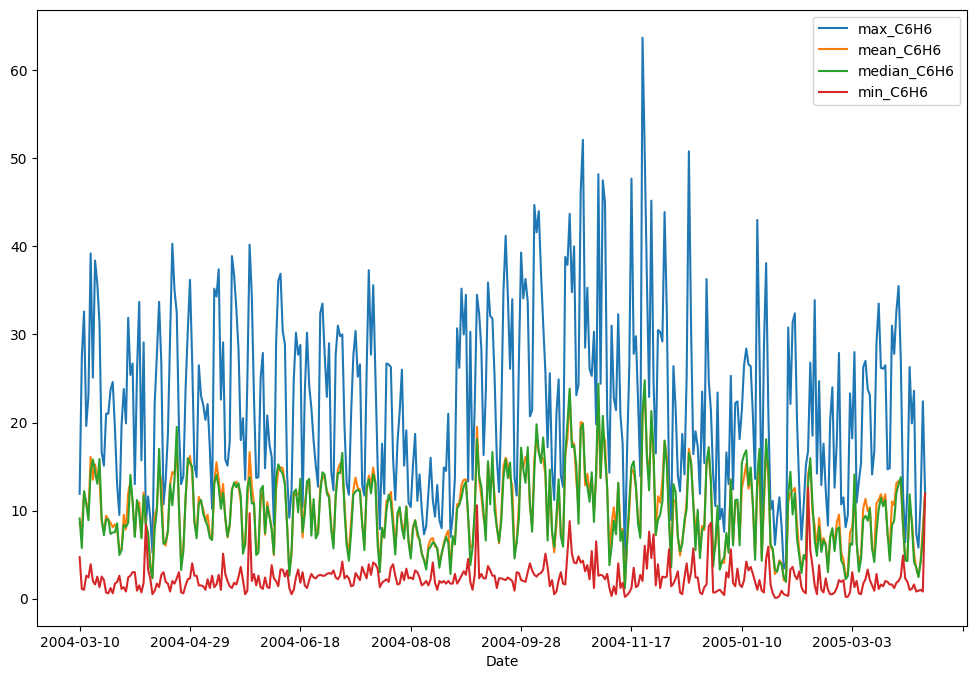

In [ ]:
#true C6H6 summaries over time
data_summary.plot(kind = "line", figsize = (12,8))

In [ ]:
C6H6_monthly = air_qu.groupby(["year", "month"]).agg(max_C6H6 = ("true_C6H6", "max"),
                                                   mean_C6H6 = ("true_C6H6", "mean"),
                                                   median_C6H6 = ("true_C6H6", "median"),
                                                   min_C6H6 = ("true_C6H6", "min"))
C6H6_monthly.head()

max_C6H6  mean_C6H6  median_C6H6  min_C6H6
year   month                                            
2004.0 3.0        39.2   9.932745         8.65       0.6
       4.0        40.3  10.389177         8.50       0.5
       5.0        40.2  10.219041         9.10       0.5
       6.0        36.9  10.595748         9.50       0.5
       7.0        37.3  10.599462         9.90       1.3

<Axes: xlabel='year,month'>

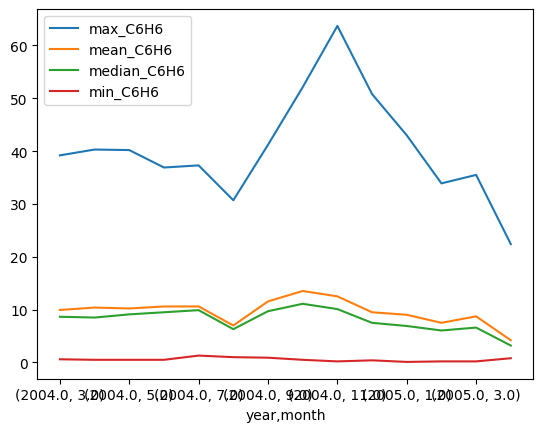

In [ ]:
#true C6H6 summaries over time
C6H6_monthly.plot(kind = "line")

In [ ]:
C6H6_weekly = air_qu.groupby(["year", "week"]).agg(max_C6H6 = ("true_C6H6", "max"),
                                                   mean_C6H6 = ("true_C6H6", "mean"),
                                                   median_C6H6 = ("true_C6H6", "median"),
                                                   min_C6H6 = ("true_C6H6", "min"))
C6H6_weekly.head()

max_C6H6  mean_C6H6  median_C6H6  min_C6H6
year   week                                            
2004.0 11.0      32.6  10.064706         9.30       1.0
       12.0      39.2  12.642262        11.60       1.3
       13.0      24.6   8.121429         7.40       0.6
       14.0      31.9   9.415758         8.20       0.8
       15.0      33.7   8.692361         7.35       0.7

<Axes: xlabel='year,week'>

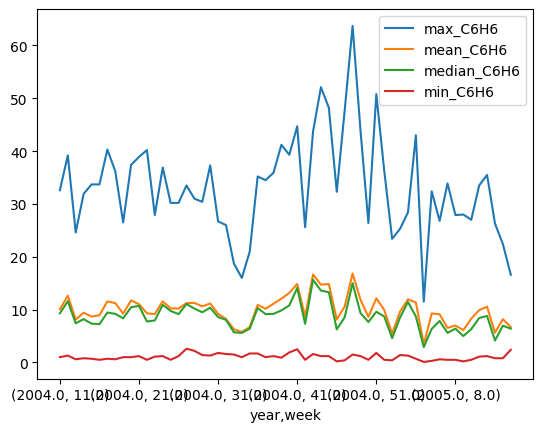

In [ ]:
#true C6H6 summaries over time
C6H6_weekly.plot(kind = "line")

In [ ]:
air_qu.Date[0].month

3